In [1]:
# sentimental analysis using CNN

In [2]:
# data preprocessing ( normalization and tokenization of the data)
# word embedding
# model architecture
# training the model
# testing the model

In [3]:
from pandas import *
df=read_csv('/content/Reddit_Data.csv')    
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [6]:
print(x_train)
print()


                                           clean_comment
33960  can’ hire someone hack series and delete there...
28142                        zelda reminds sae san from 
14657  chill man you are much indian eat beef and hum...
11762  based india pede love meeting other people who...
31903                                they banned reddit 
...                                                  ...
16850                     what fucking snake the friend 
6265    hunches the bubble indian startups will burst...
11284  this alternative medicine which alternative me...
860     hate the aap because has absolutely real plan...
15795   fabricated and could absolutely brilliant col...

[24956 rows x 1 columns]



In [31]:
# cleaning and tokenization

import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from tqdm import tqdm

def data_cln(df):
  rev=[]
  for i in tqdm(df['clean_comment']):
    text=re.sub("[^a-zA-Z]"," ",str(i))
    words=word_tokenize(text) 
    rev.append(words)
  return rev

x1_train=data_cln(x_train) 
x1_test=data_cln(x_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 12293/12293 [00:01<00:00, 6384.28it/s]


In [8]:
# text cleaning and data cleaning is done

In [33]:
# converting the stings to integers           
NB_WORDS=500
from keras.preprocessing.text import Tokenizer
tk = Tokenizer(num_words=NB_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', split=" ")
tk.fit_on_texts(x1_train)
X_train_seq = tk.texts_to_sequences(x1_train)   
X_test_seq = tk.texts_to_sequences(x1_test)

In [10]:
print(X_train_seq[0])
print(y_train)

[16, 131, 2, 26]
33960    0
28142    0
14657    1
11762    1
31903    0
        ..
16850   -1
6265     1
11284    0
860      1
15795    1
Name: category, Length: 24956, dtype: int64


In [34]:
from keras.preprocessing import sequence
train_x=sequence.pad_sequences(X_train_seq,maxlen=NB_WORDS)       
test_x=sequence.pad_sequences(X_test_seq,maxlen=NB_WORDS)   
train_x1=(train_x)
test_x1=(test_x) 

[[  0   0   0 ... 131   2  26]
 [  0   0   0 ...   0   0  24]
 [  0   0   0 ...  76  65   2]
 ...
 [  0   0   0 ...  55  55  55]
 [  0   0   0 ...   1 326 290]
 [  0   0   0 ...  58 357  10]]


In [106]:
# creating a model
from tensorflow.keras.models import Sequential
import tensorflow as tf
model=Sequential()
model.add(tf.keras.layers.Embedding(1000,300,input_length=500)) # 1000 unique words and each word has a vector of size 300
model.add(tf.keras.layers.Conv1D(64,3,activation='relu'))  # 64 filters of size 3
model.add(tf.keras.layers.MaxPooling1D(2,2))
model.add(tf.keras.layers.Conv1D(32,3,activation='relu'))  # 64 filters of size 3
model.add(tf.keras.layers.MaxPooling1D(2,2))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])  
#model.summary()
hist=model.fit(train_x1,y_train.values.reshape(-1,1),epochs=10,validation_split=0.2,batch_size=128,verbose=1) 

Epoch 1/10
156/156 [==============================] - 4s 23ms/step - loss: 0.5128 - accuracy: 0.3603 - val_loss: 0.4846 - val_accuracy: 0.3575
Epoch 2/10
156/156 [==============================] - 3s 19ms/step - loss: 0.5005 - accuracy: 0.3658 - val_loss: 0.4844 - val_accuracy: 0.3582
Epoch 3/10
156/156 [==============================] - 3s 19ms/step - loss: 0.4978 - accuracy: 0.3669 - val_loss: 0.4765 - val_accuracy: 0.3587
Epoch 4/10
156/156 [==============================] - 3s 20ms/step - loss: 0.4929 - accuracy: 0.3681 - val_loss: 0.4761 - val_accuracy: 0.3610
Epoch 5/10
156/156 [==============================] - 3s 20ms/step - loss: 0.4898 - accuracy: 0.3689 - val_loss: 0.4746 - val_accuracy: 0.3603
Epoch 6/10
156/156 [==============================] - 3s 20ms/step - loss: 0.4875 - accuracy: 0.3695 - val_loss: 0.4783 - val_accuracy: 0.3595
Epoch 7/10
156/156 [==============================] - 3s 20ms/step - loss: 0.4870 - accuracy: 0.3691 - val_loss: 0.4785 - val_accuracy: 0.3618

In [105]:
print(len(train_x1))
print()
print(len(y_train.values.reshape(-1,1)))
print()
print(len(test_x1))
print()
print(len(y_test.values.reshape(-1,1)))        

24956

24956

12293

12293


In [86]:
# testing the model
y_pred=model.predict(test_x1)   

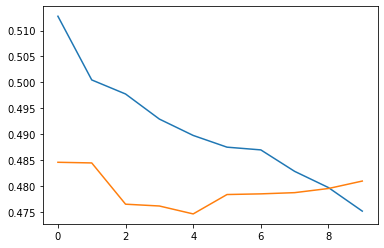

In [109]:
import matplotlib.pyplot as plt
a=hist.history['loss']
b=hist.history['val_loss']
plt.plot(a)
plt.plot(b)
plt.show() 